In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#### Create matrix of probability distributions for each level of the Interview Results

In [6]:
m0 = np.array([.75,.25,.667,.333,.0000001,.9999999]).reshape((3,-1))
m0

array([[7.500000e-01, 2.500000e-01],
       [6.670000e-01, 3.330000e-01],
       [1.000000e-07, 9.999999e-01]])

#### Create matrix of probabilities for the overall Hire Results

In [7]:
tot0=np.array([.5,.5])
tot0

array([0.5, 0.5])

#### Calculate the ENTROPY of the overall Hire Results

In [13]:
-(tot0*np.log2(tot0))
hire=sum(-(tot0*np.log2(tot0)))
hire

1.0

#### Calculate the ENTROPY for the levels of the Interview Results

In [17]:
excel= -(m0[0,0]*np.log2(m0[0,0]))-(m0[0,1]*np.log2(m0[0,1]))
print('excel', excel)
good = -(m0[1,0]*np.log2(m0[1,0]))-(m0[1,1]*np.log2(m0[1,1]))
print('good', good)
poor = -(m0[2,0]*np.log2(m0[2,0]))-(m0[2,1]*np.log2(m0[2,1]))
print('poor', poor)

interview = (4/14)*excel+(6/14)*good+(4/14)*poor
print('interview', interview)

excel 0.8112781244591328
good 0.9179621399872385
poor 2.4696191632206375e-06
interview 0.6252068011597582


#### Calculate Information Gain

In [18]:
gain = hire-interview
gain

0.37479319884024176

#### Cross-entropy using one-hot encoded vector

In [89]:
P = [.10, .15, .05, .05, .01, .64]
Q = [0,0,0,0,0,1]

scipy.stats.entropy(Q,P)


0.44628710262841953

#### Define an actual and a predicted probability distribution with three categories in each distribution

In [20]:
act = [0.10, 0.40, 0.50]
pred = [0.80, 0.15, 0.05]

#### Calculate the ENTROPY of the actual and predicted probability distributions with THEMSELVES

In [25]:
-(act*np.log2(act))

array([0.33219281, 0.52877124, 0.5       ])

In [26]:
sum(-(act*np.log2(act)))

1.360964047443681

In [27]:
-(pred*np.log2(pred))

array([0.25754248, 0.41054484, 0.2160964 ])

In [28]:
sum(-(pred*np.log2(pred)))

0.8841837197791889

#### Plot the distributions of the category probabilities


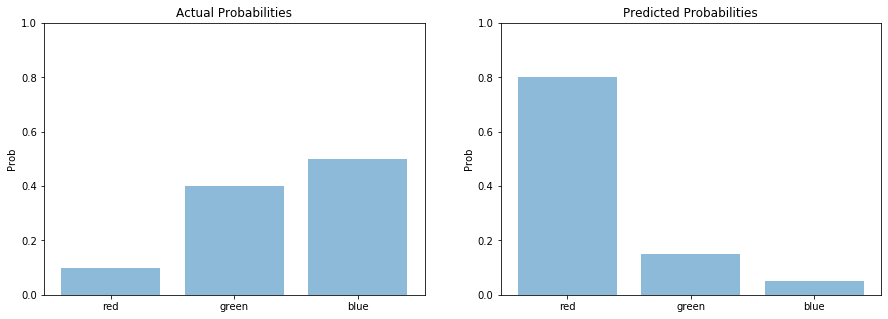

In [53]:
names = ("red","green","blue")
y_pos = np.arange(len(names))

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)

plt.bar(y_pos, act, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.title('Actual Probabilities')
plt.ylabel('Prob')
plt.ylim((0,1))


plt.subplot(1, 2, 2)
plt.bar(y_pos, pred, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.title('Predicted Probabilities')
plt.ylabel('Prob')
plt.ylim((0,1))

plt.show()




#### Calculating the cross-entropy of Actual vs Predicted probabilities is accumulating results category by category

In [54]:
-(((act[0])*np.log2(pred[0]))+
 ((act[1])*np.log2(pred[1]))+
 ((act[2])*np.log2(pred[2])))

3.2879430945989

#### Cross-entropy is not symmetrical
Calculate cross-entropy of Predicted vs Actual

In [55]:
-((pred[0])*(np.log2(act[0]))+
 ((pred[1])*np.log2(act[1]))+
 ((pred[2])*np.log2(act[2])))

2.9058316901429944

Cross-entropy from comparing predicted vs actual discrete probability distributions.  
First compare actual to predicted and then compare predicted to actual.  The results are not the same.  Cross-entropy is not symmetrical.

#### Calculate CROSS-ENTROPY of Actual & Predicted

In [65]:
CE=[]
for i in range(len(act)):
    CE.append(-(act[i]*np.log2(pred[i])))
print(CE)
sum(CE)

[0.03219280948873623, 1.0947862376664825, 2.1609640474436813]


3.2879430945989

#### Calculate CROSS-ENTROPY of Predicted & Actual

In [66]:
CE=[]
for i in range(len(act)):
    CE.append(-(pred[i]*np.log2(act[i])))
print(CE)
sum(CE)

[2.65754247590989, 0.19828921423310433, 0.05]


2.9058316901429944

#### Create a FUNCTION for calculating cross-entropy

In [70]:
def cross_entropy(act, pred):
    CE = []
    for i in range(len(act)):
        CE.append(-(act[i]*np.log2(pred[i])))
    return(sum(CE))

#### Calculate the cross-entropy of the actual and predicted probability distributions with THEMSELVES
That is, calculate the ENTROPY of a probability distribution

In [74]:
ce0=0
ce0 = cross_entropy(act,act)
print(ce0)
ce1=0
ce1 = cross_entropy(pred,pred)
print(ce1)

1.360964047443681
0.8841837197791889


In [75]:
ce0=0
ce0 = cross_entropy(act,pred)
print(ce0)
ce1=0
ce1 = cross_entropy(pred,act)
print(ce1)

3.2879430945989
2.9058316901429944


#### Create a function to calculate K-L DIVERGENCE

In [80]:
def kl_divergence(act, pred):
    KL = []
    for i in range(len(act)):
        KL.append(-(act[i]*np.log2(act[i]/pred[i])))
    return(sum(KL))

In [81]:
-kl_divergence(act,pred)

1.9269790471552186

In [82]:
-kl_divergence(pred,act)

2.0216479703638055